# IMPORTING REQUIRED LIBRARIES

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# INSERT DATA

In [44]:
df = pd.read_csv('/content/Copy of Dataset .csv')

# DATA PREPROCESSING

In [45]:
df.shape

(9551, 21)

In [46]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [48]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [49]:
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [53]:
df['Cuisines'] = df['Cuisines'].apply(lambda x:x.replace(',',' '))

df['Cuisines'].unique()

array(['French  Japanese  Desserts', 'Japanese',
       'Seafood  Asian  Filipino  Indian', ..., 'Burger  Izgara',
       'World Cuisine  Patisserie  Cafe', 'Italian  World Cuisine'],
      dtype=object)

In [54]:
df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [55]:
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Pounds(��)','PO'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Botswana Pula(P)','P'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Brazilian Real(R$)','BR'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Dollar($)','D'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Dollar($)','D'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Emirati Diram(AED)','AED'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Indian Rupees(Rs.)','R'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Indonesian Rupiah(IDR)','IDR'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('NewZealand($)','NZ'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Qatari Rial(QR)','QR'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Rand(R)','RA'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Sri Lankan Rupee(LKR)','LKR'))
df['Currency'] = df['Currency'].apply(lambda x:x.replace('Turkish Lira(TL)','TL'))
df['Currency'].unique()

array(['P', 'BR', 'D', 'AED', 'R', 'IDR', 'NZ', 'PO', 'QR', 'RA', 'LKR',
       'TL'], dtype=object)

# DATA VISUALIZATION

<ipython-input-56-ef6913cff68f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Votes'])


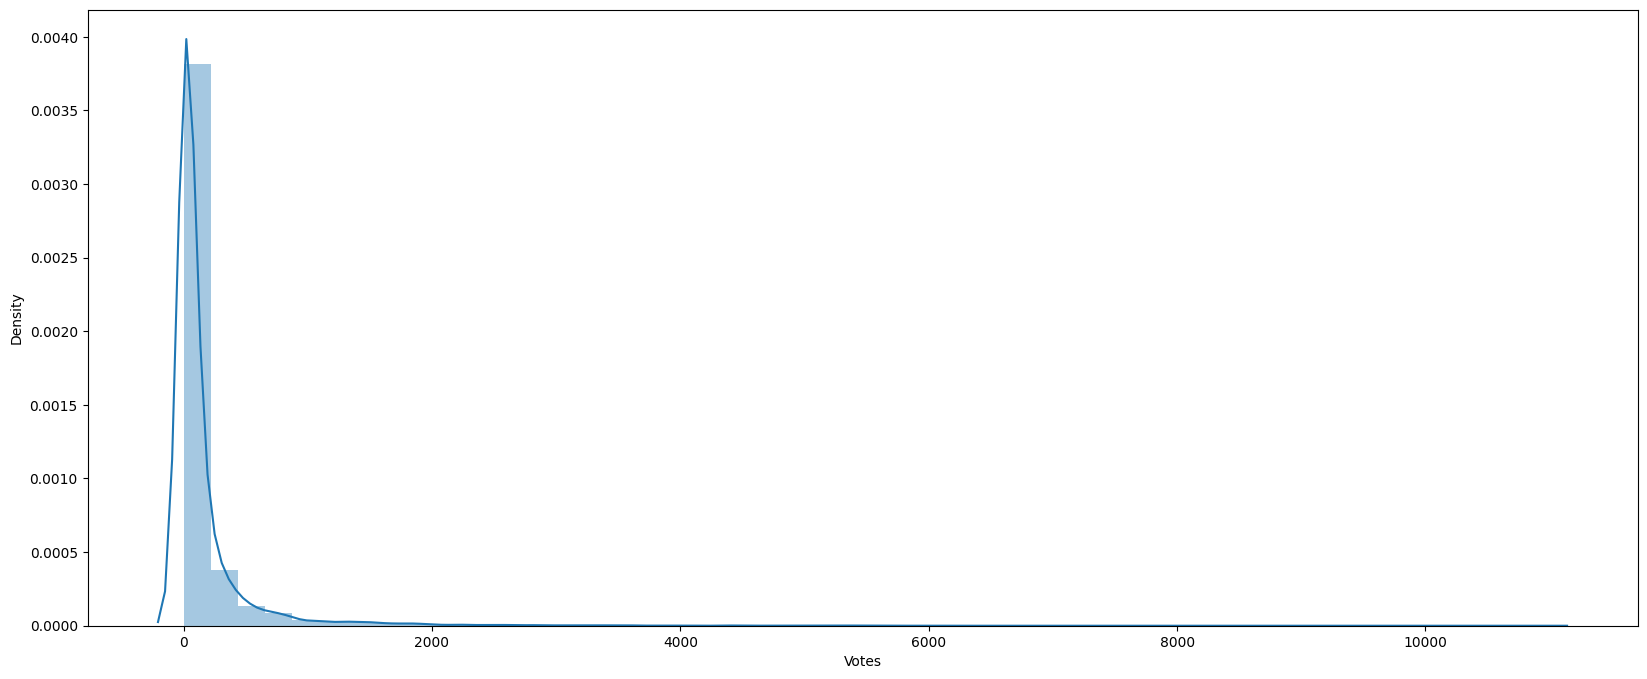

In [56]:
plt.figure(figsize=(20,8)) #size chages of X and Y axis
sns.distplot(df['Votes'])
plt.show()

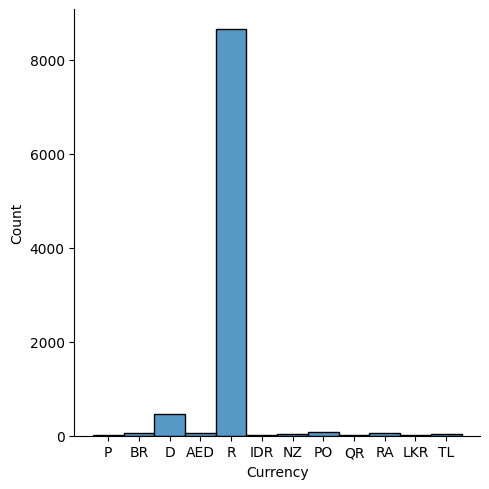

In [57]:
sns.displot(df['Currency']) #displot graph

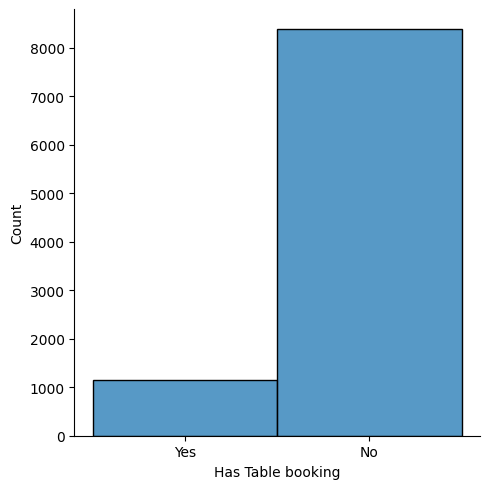

In [58]:
sns.displot(df['Has Table booking']) #displot graph

<ipython-input-59-c7a20d2ee1a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True) #heatmap


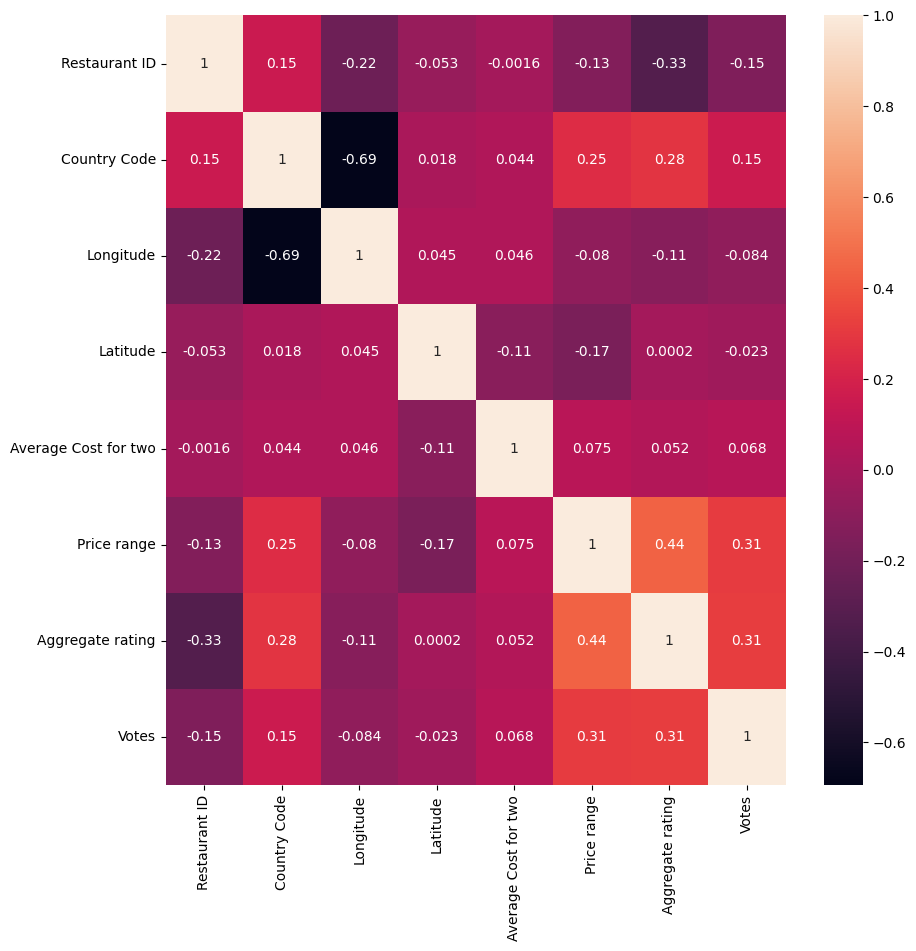

In [59]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True) #heatmap
plt.show()

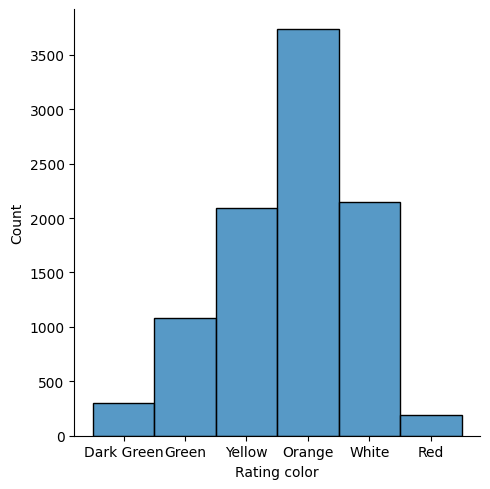

In [60]:
sns.displot(df['Rating color']) #displot graph

# IMPLEMENT THE ML MODEL

In [61]:
y=df['Votes']

In [62]:
X = df['Aggregate rating']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)

In [65]:
y_train

7398      3
8493      0
9190     95
100     117
4934      7
       ... 
9381    305
7300     29
1353     14
7302      3
1298      9
Name: Votes, Length: 6679, dtype: int64

In [66]:
y_test

1769     23
2362     54
610     449
7663      3
6893      8
       ... 
4138     89
8949      0
4391     38
8334      0
1608     33
Name: Votes, Length: 2863, dtype: int64

In [67]:
X_train

7398    0.0
8493    0.0
9190    3.6
100     3.7
4934    2.8
       ... 
9381    4.5
7300    3.4
1353    3.3
7302    0.0
1298    3.1
Name: Aggregate rating, Length: 6679, dtype: float64

In [68]:
X_test

1769    2.4
2362    4.0
610     4.1
7663    0.0
6893    3.0
       ... 
4138    3.7
8949    0.0
4391    2.6
8334    0.0
1608    3.4
Name: Aggregate rating, Length: 2863, dtype: float64

# APPLY MODELS -
1. Random Forest



### **Random Forest**

In [69]:
# Sklearn is used as a libraryfrom sklearn.linear_model import LinearRegression

In [70]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
X_train = X_train.values.reshape(-1, 1)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test.values.reshape(-1, 1))

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.2313787747689685
